# **STEP 1: Import & QA the data**
Import & join two customer data tables, then remove duplicate rows & columns and fill in missing values.

**✓Import/Open both tables in the "Bank_Churn_Messy.xlsx" file**

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving Bank_Churn_Messy.xlsx to Bank_Churn_Messy (2).xlsx


In [ ]:
import pandas as pd

churn_cust_info = pd.read_excel("Bank_Churn_Messy.xlsx")

churn_cust_info.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary
0,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88
1,15647311,Hill,608,Spain,Female,41.0,1,€112542.58
2,15619304,Onio,502,French,Female,42.0,8,€113931.57
3,15701354,Boni,699,FRA,Female,39.0,1,€93826.63
4,15737888,Mitchell,850,Spain,Female,43.0,2,€79084.1


In [ ]:
churn_acct_info = pd.read_excel("Bank_Churn_Messy.xlsx", sheet_name=1)

churn_acct_info.head()

,CustomerId,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited
0,15634602,€0.0,1,Yes,2,Yes,1
1,15634602,€0.0,1,Yes,2,Yes,1
2,15647311,€83807.86,1,Yes,1,Yes,0
3,15619304,€159660.8,3,No,8,No,1
4,15701354,€0.0,2,No,1,No,0


**✓ Used a left join "Accounttt_Info" to "Customer_Info" using the "CustomerID" column.**

In [ ]:
churn_df = churn_cust_info.merge(churn_acct_info, how="left", on="CustomerId")

churn_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure_x,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure_y,IsActiveMember,Exited
0,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88,€0.0,1,Yes,2,Yes,1
1,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88,€0.0,1,Yes,2,Yes,1
2,15647311,Hill,608,Spain,Female,41.0,1,€112542.58,€83807.86,1,Yes,1,Yes,0
3,15619304,Onio,502,French,Female,42.0,8,€113931.57,€159660.8,3,No,8,No,1
4,15701354,Boni,699,FRA,Female,39.0,1,€93826.63,€0.0,2,No,1,No,0


**✓ Check for and remove duplicated rows and columns.**

In [ ]:
churn_df = churn_df.drop("Tenure_y", axis=1).rename({"Tenure_x":"Tenure"}, axis=1).drop_duplicates()

churn_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88,€0.0,1,Yes,Yes,1
2,15647311,Hill,608,Spain,Female,41.0,1,€112542.58,€83807.86,1,Yes,Yes,0
3,15619304,Onio,502,French,Female,42.0,8,€113931.57,€159660.8,3,No,No,1
4,15701354,Boni,699,FRA,Female,39.0,1,€93826.63,€0.0,2,No,No,0
5,15737888,Mitchell,850,Spain,Female,43.0,2,€79084.1,€125510.82,1,Yes,Yes,0


In [ ]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          9997 non-null   object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              9997 non-null   float64
 6   Tenure           10000 non-null  int64  
 7   EstimatedSalary  10000 non-null  object 
 8   Balance          10000 non-null  object 
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  object 
 11  IsActiveMember   10000 non-null  object 
 12  Exited           10000 non-null  int64  
dtypes: float64(1), int64(5), object(7)
memory usage: 1.1+ MB


# **STEP 2: Clean the Data**
Clean the data by fixing inconsistencies in labeling, handling erroneous values, and fixing currency fields.

**✓ Checked the data types for each column and make any necessary fixes.**

In [ ]:
churn_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88,€0.0,1,Yes,Yes,1
2,15647311,Hill,608,Spain,Female,41.0,1,€112542.58,€83807.86,1,Yes,Yes,0
3,15619304,Onio,502,French,Female,42.0,8,€113931.57,€159660.8,3,No,No,1
4,15701354,Boni,699,FRA,Female,39.0,1,€93826.63,€0.0,2,No,No,0
5,15737888,Mitchell,850,Spain,Female,43.0,2,€79084.1,€125510.82,1,Yes,Yes,0


In [ ]:
#churn_df["EstimatedSalary"] = churn_df["EstimatedSalary"].str.replace("€", "").astype(float)

churn_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          9997 non-null   object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              9997 non-null   float64
 6   Tenure           10000 non-null  int64  
 7   EstimatedSalary  10000 non-null  object 
 8   Balance          10000 non-null  object 
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  object 
 11  IsActiveMember   10000 non-null  object 
 12  Exited           10000 non-null  int64  
dtypes: float64(1), int64(5), object(7)
memory usage: 1.1+ MB


In [ ]:
#churn_df["Balance"] = churn_df["Balance"].str.replace("€", "").astype(float)

churn_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          9997 non-null   object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              9997 non-null   float64
 6   Tenure           10000 non-null  int64  
 7   EstimatedSalary  10000 non-null  object 
 8   Balance          10000 non-null  object 
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  object 
 11  IsActiveMember   10000 non-null  object 
 12  Exited           10000 non-null  int64  
dtypes: float64(1), int64(5), object(7)
memory usage: 1.1+ MB


In [ ]:
churn_df[churn_df.isna().any(axis=1) == True]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
29,15728693,NaN,574,Germany,Female,NaN,3,-€999999,€141349.43,1,Yes,Yes,0
122,15580203,NaN,674,Spain,Male,NaN,6,-€999999,€120193.42,1,No,No,0
9390,15756954,NaN,538,France,Female,NaN,2,-€999999,€0.0,1,Yes,Yes,0


In [ ]:
churn_df = churn_df.fillna(value={"Surname": "MISSING", "Age": churn_df["Age"].median})

churn_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CustomerId       10000 non-null  int64 
 1   Surname          10000 non-null  object
 2   CreditScore      10000 non-null  int64 
 3   Geography        10000 non-null  object
 4   Gender           10000 non-null  object
 5   Age              10000 non-null  object
 6   Tenure           10000 non-null  int64 
 7   EstimatedSalary  10000 non-null  object
 8   Balance          10000 non-null  object
 9   NumOfProducts    10000 non-null  int64 
 10  HasCrCard        10000 non-null  object
 11  IsActiveMember   10000 non-null  object
 12  Exited           10000 non-null  int64 
dtypes: int64(5), object(8)
memory usage: 1.1+ MB


In [ ]:
churn_df.iloc[[28, 121, 9389]]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
29,15728693,MISSING,574,Germany,Female,<bound method Series.median of 0 42.0\n...,3,-€999999,€141349.43,1,Yes,Yes,0
122,15580203,MISSING,674,Spain,Male,<bound method Series.median of 0 42.0\n...,6,-€999999,€120193.42,1,No,No,0
9390,15756954,MISSING,538,France,Female,<bound method Series.median of 0 42.0\n...,2,-€999999,€0.0,1,Yes,Yes,0


**✓ Profile the numeric columns in the data. Are there any extreme or non-sensical values? If so, impute them with the median of the column.**

In [ ]:
churn_df.describe()

,CustomerId,CreditScore,Tenure,NumOfProducts,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,5.012800,1.530200,0.203700
std,7.193619e+04,96.653299,2.892174,0.581654,0.402769
min,1.556570e+07,350.000000,0.000000,1.000000,0.000000
25%,1.562853e+07,584.000000,3.000000,1.000000,0.000000
50%,1.569074e+07,652.000000,5.000000,1.000000,0.000000
75%,1.575323e+07,718.000000,7.000000,2.000000,0.000000
max,1.581569e+07,850.000000,10.000000,4.000000,1.000000


**✓Checked the values in the "Geography" column and combine any variations in country names to a single value per country.**

In [ ]:
churn_df["Geography"].value_counts()

,count
Geography,
Germany,2509
Spain,2477
France,1741
French,1655
FRA,1618


In [ ]:
import numpy as np


churn_df["Geography"] = np.where(churn_df["Geography"].isin(["FRA", "France", "French"]), "France", churn_df["Geography"])

churn_df["Geography"].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [ ]:
churn_df = (
    pd.read_excel("Bank_Churn_Messy.xlsx")
    .merge(pd.read_excel("Bank_Churn_Messy.xlsx", sheet_name=1), how="left", on="CustomerId")
    .drop_duplicates()
    .drop("Tenure_y", axis=1)
    .rename({"Tenure_x": "Tenure"}, axis=1)
    .assign(
        EstimatedSalary=lambda x: x["EstimatedSalary"].str.replace("€", "").astype("float"),
        Balance=lambda x: x["Balance"].str.replace("€", "").astype("float"),
        Geography=lambda x: np.where(x["Geography"].isin(["FRA", "France", "French"]), "France", x["Geography"]),
      )
    .assign(EstimatedSalary= lambda x: x["EstimatedSalary"].replace(-999999, x["EstimatedSalary"].median()))
)

churn_df = churn_df.fillna(value={"Surname": "MISSING", "Age": churn_df["Age"].median()})

churn_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,15634602,Hargrave,619,France,Female,42.0,2,101348.88,0.00,1,Yes,Yes,1
2,15647311,Hill,608,Spain,Female,41.0,1,112542.58,83807.86,1,Yes,Yes,0
3,15619304,Onio,502,France,Female,42.0,8,113931.57,159660.80,3,No,No,1
4,15701354,Boni,699,France,Female,39.0,1,93826.63,0.00,2,No,No,0
5,15737888,Mitchell,850,Spain,Female,43.0,2,79084.10,125510.82,1,Yes,Yes,0


# **STEP 3: Explore the data (EDA)**
Explore the target variable and look at feature-target relationships for categorical and numeric fields.

*** ✓ Built a bar chart displaying the count of churners (Exited=1) vs. non-churners (Exited=0)***

<Axes: xlabel='Exited'>

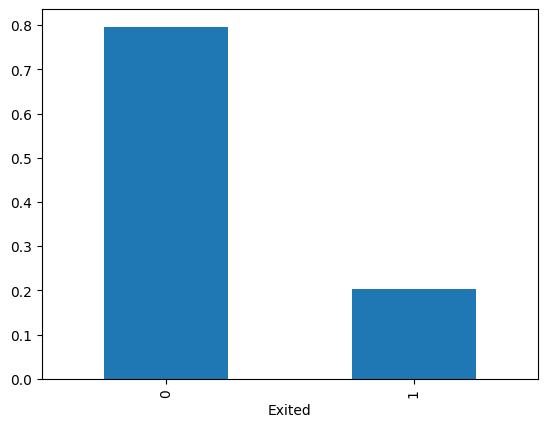

In [ ]:
churn_df["Exited"].value_counts(normalize=True).plot.bar()

**✓ Explored the categorical variables vs. the target, and looked at the percentage of Churners by "Geography" and "Gender"**

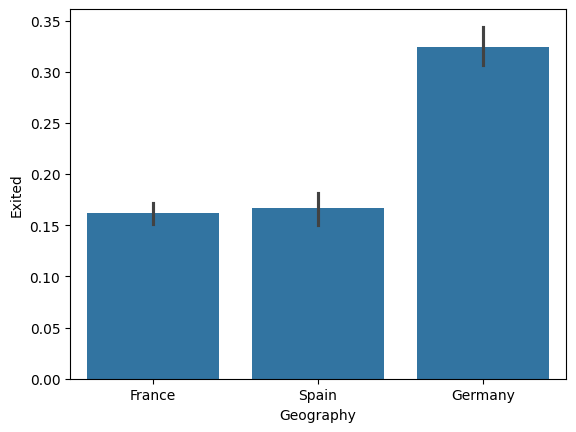

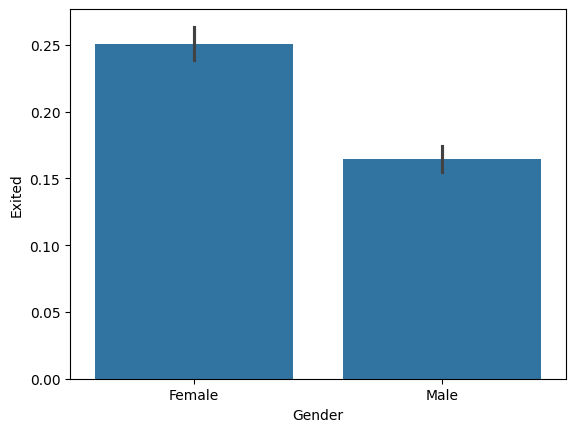

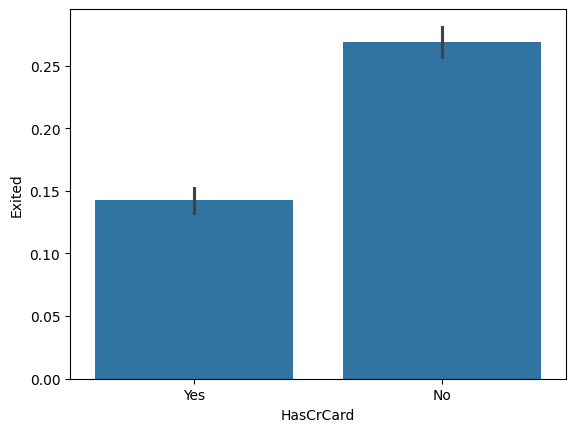

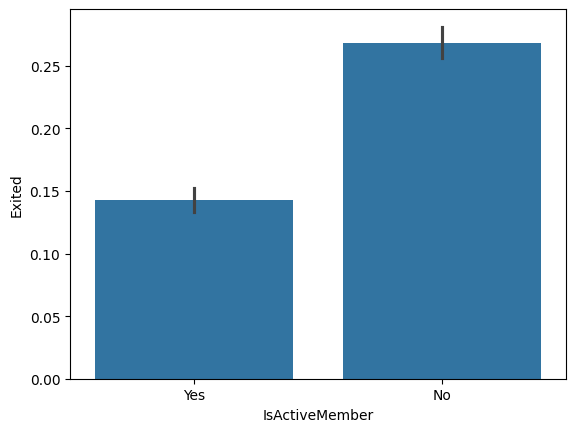

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in churn_df.drop("Surname", axis=1).select_dtypes("object"):
    sns.barplot(data=churn_df, x=col, y="Exited")
    plt.show()

In [ ]:
churn_df.select_dtypes("object")

,Surname,Geography,Gender,HasCrCard,IsActiveMember
0,Hargrave,France,Female,Yes,Yes
2,Hill,Spain,Female,Yes,Yes
3,Onio,France,Female,No,No
4,Boni,France,Female,No,No
5,Mitchell,Spain,Female,Yes,Yes
...,...,...,...,...,...
9996,Obijiaku,France,Male,No,No
9997,Johnstone,France,Male,Yes,Yes
9998,Liu,France,Female,Yes,Yes
9999,Sabbatini,Germany,Male,No,No


**✓ Built box plots for each numeric field, broken out by churners vs. non-churners.**

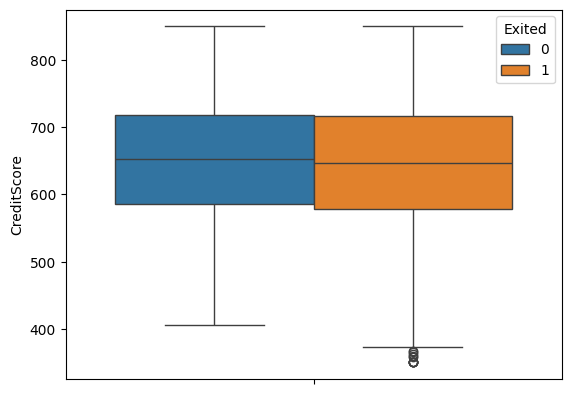

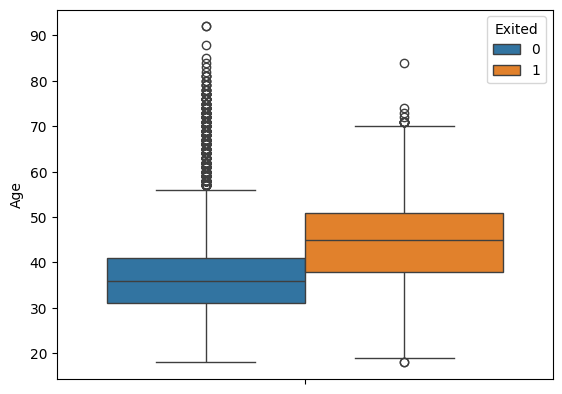

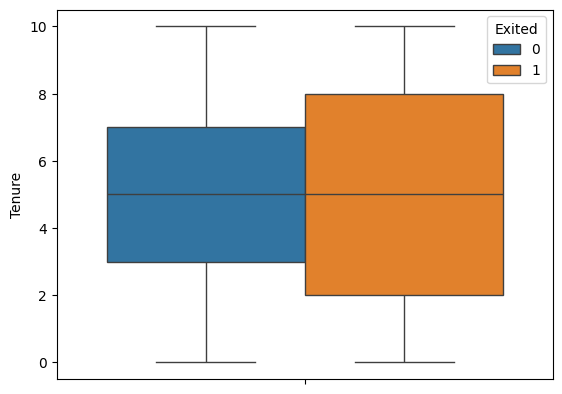

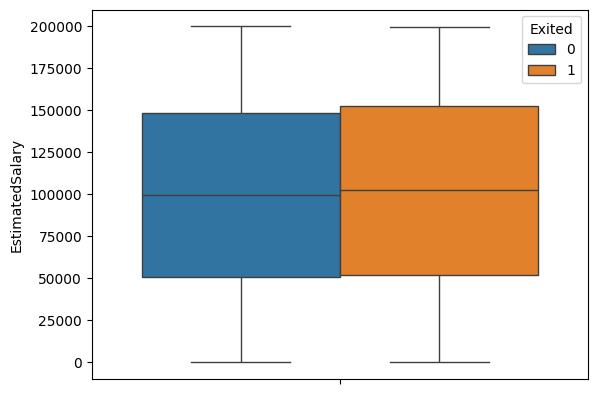

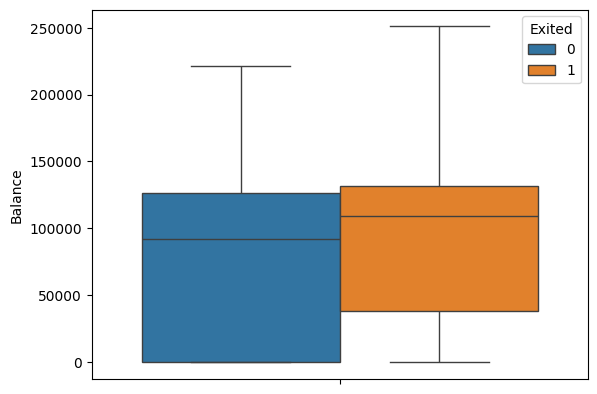

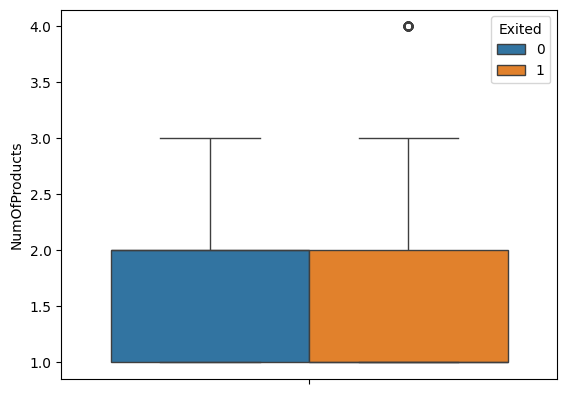

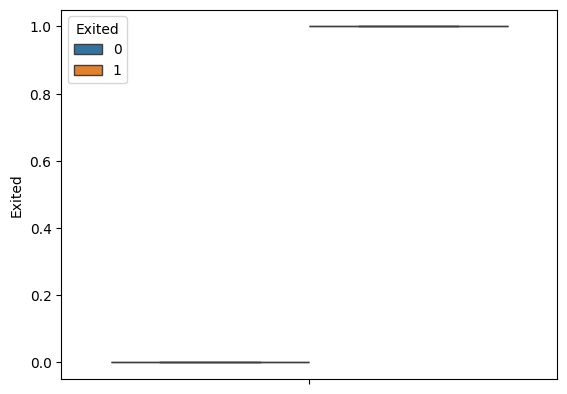

In [ ]:
for col in churn_df.drop("CustomerId", axis=1).select_dtypes("number"):
    sns.boxplot(data=churn_df, y=col, hue="Exited")
    plt.show()

**✓ Built histograms for each numeric. fieeeld,  broken out by churners vs. non-churners.**

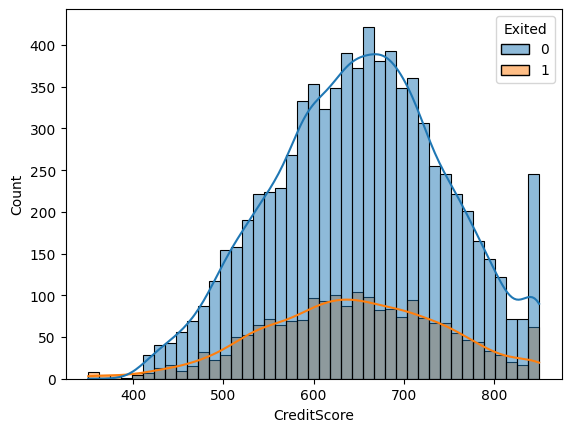

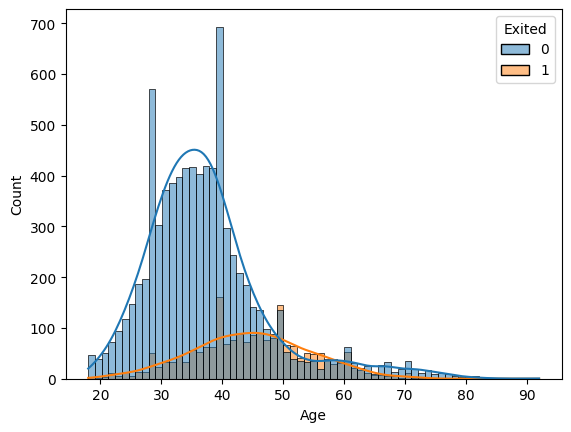

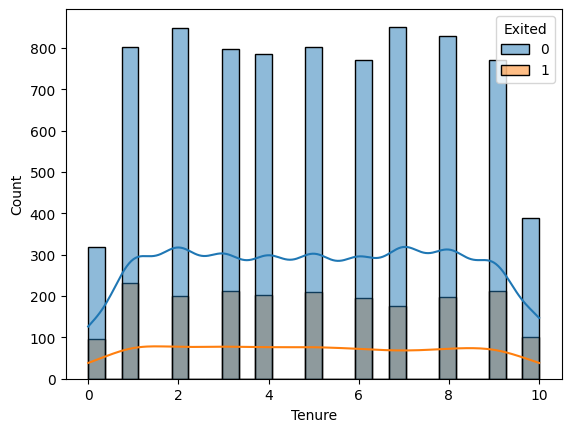

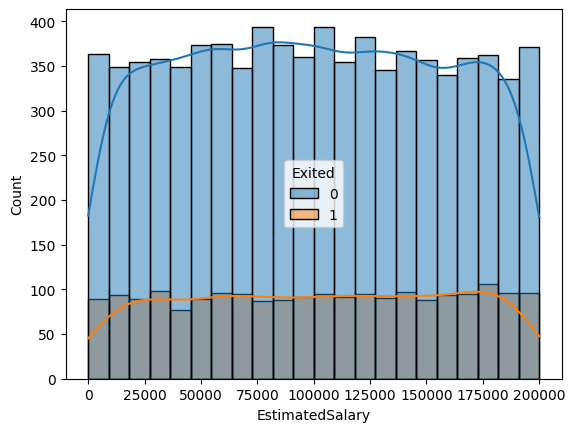

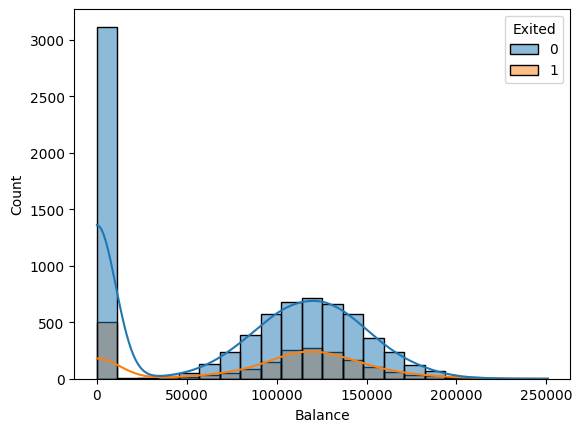

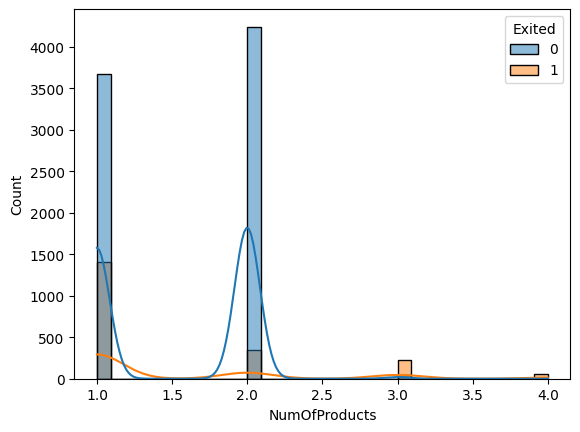

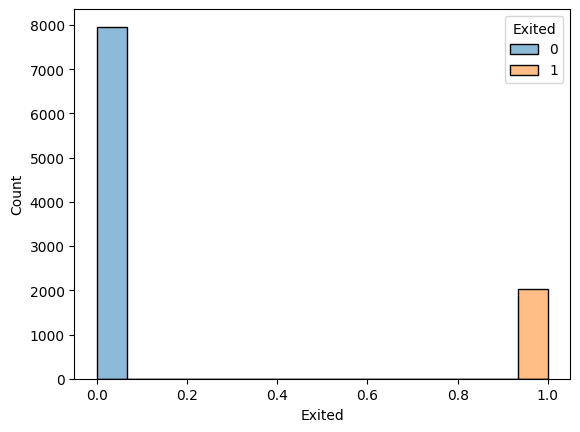

In [ ]:
for col in churn_df.drop("CustomerId", axis=1).select_dtypes("number"):
    sns.histplot(data=churn_df, x=col, hue="Exited", kde=True)
    plt.show()

# **STEP 4: Data Preparaion and Feature Engineering**
Prepared the data for modeling through feature selection, feature engineering, and data splitting.

**✓ Created a dataset that excludes any columns that aren't be suitable for modeling.**

In [ ]:
modeling_df= churn_df.drop(["CustomerId", "Surname"], axis=1)

modeling_df.head()

,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,619,France,Female,42.0,2,101348.88,0.00,1,Yes,Yes,1
2,608,Spain,Female,41.0,1,112542.58,83807.86,1,Yes,Yes,0
3,502,France,Female,42.0,8,113931.57,159660.80,3,No,No,1
4,699,France,Female,39.0,1,93826.63,0.00,2,No,No,0
5,850,Spain,Female,43.0,2,79084.10,125510.82,1,Yes,Yes,0


**✓Created dummy variables for categorical fields.**

In [ ]:
modeling_df = pd.get_dummies(modeling_df, drop_first=True)

**✓ Created a new "balance_v_income" feature, which divides a customer's bank balance by their estimated salary, then visualize that feature vs. churn status.**

In [ ]:
modeling_df["Balance_v_Sal"] = modeling_df["Balance"] / modeling_df["EstimatedSalary"]

modeling_df.head()

,CreditScore,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,Exited,Geography_Germany,Geography_Spain,Gender_Male,HasCrCard_Yes,IsActiveMember_Yes,Balance_v_Sal
0,619,42.0,2,101348.88,0.00,1,1,False,False,False,True,True,0.000000
2,608,41.0,1,112542.58,83807.86,1,0,False,True,False,True,True,0.744677
3,502,42.0,8,113931.57,159660.80,3,1,False,False,False,False,False,1.401375
4,699,39.0,1,93826.63,0.00,2,0,False,False,False,False,False,0.000000
5,850,43.0,2,79084.10,125510.82,1,0,False,True,False,True,True,1.587055


<Axes: ylabel='Balance_v_Sal'>

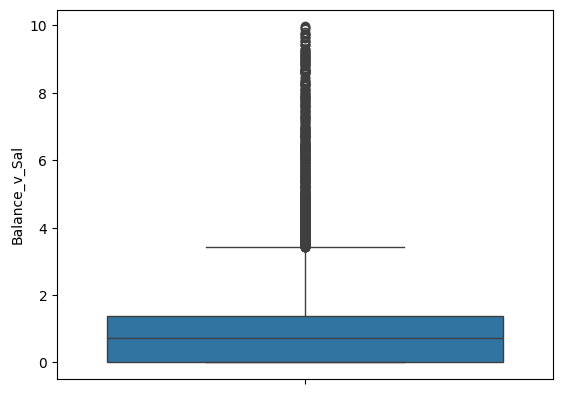

In [ ]:
sns.boxplot(data=modeling_df.query("Balance_v_Sal < 10"), y="Balance_v_Sal")


In [ ]:
modeling_df.describe()

,CreditScore,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,Exited,Balance_v_Sal
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921500,5.012800,100092.252506,76485.889288,1.530200,0.203700,3.878703
std,96.653299,10.487552,2.892174,57510.146401,62397.405202,0.581654,0.402769,108.337260
min,350.000000,18.000000,0.000000,11.580000,0.000000,1.000000,0.000000,0.000000
25%,584.000000,32.000000,3.000000,51002.110000,0.000000,1.000000,0.000000,0.000000
50%,652.000000,37.000000,5.000000,100196.062500,97198.540000,1.000000,0.000000,0.747002
75%,718.000000,44.000000,7.000000,149388.247500,127644.240000,2.000000,0.000000,1.514022
max,850.000000,92.000000,10.000000,199992.480000,250898.090000,4.000000,1.000000,10614.655440


<Axes: ylabel='Balance_v_Sal'>

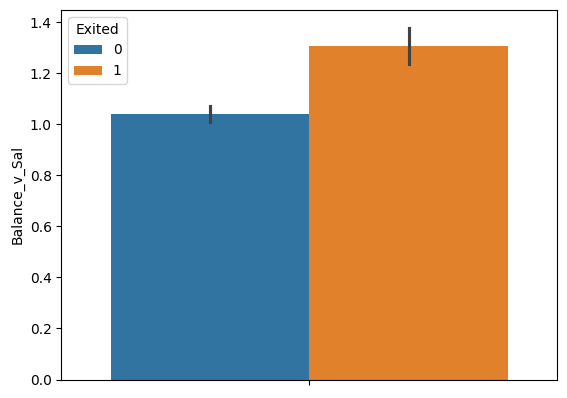

In [ ]:
sns.barplot(data=modeling_df.query("Balance_v_Sal < 10"), y="Balance_v_Sal", hue="Exited")